# Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, we a build a predictive model that predicte if passenger servived or not the  using passenger data (ie name, age, gender, socio-economic class, etc).

# Table of content
## * Data Preprocessing
###   -exploring and modifying the dataset
###   -Ctigorical Discreatization
###   -Esential Data Analysis
###   -Taking care of noisy data
###   -Visualized Data analysis
###   -Taking care of missing data    
###   -Encoding categorical data
###   -Splitting the dataset into the Training set and Test set
###   -Feature Scaling
## *ML Models
###   -K-Nearest Neighbors (K-NN)
###   -Decision Tree Classification
###   -Naive Bayes Classifier (GaussianNB) 
###   -Naive Bayes Classifier (CategoricalNB) 

# Data Preprocessing

## Importing the libraries

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Importing ,exploring and modifying the dataset

In [117]:
df = pd.read_csv('Titanic-Dataset.csv')

In [118]:
df.shape

(1309, 12)

#### Check for dublicates rows

In [119]:
df.duplicated().sum()

0

### Renaming, Rewritnig ,Ordering and Dropppping irrelevant rows

In [120]:
df.rename(columns = {'Pclass':'Class','Sex':'Gender', 'Embarked':'POE'}, inplace = True)

#SibSp  >>> No. of siblings / spouses aboard the Titanic
#Parch  >>> No. of parents / children aboard the Titanic
# POE   >>> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

df['Gender'] = df['Gender'].replace({'male':1, 'female':0})      
df = df.drop(columns=['Name','PassengerId','Ticket']) # Irrelevant
df = df.reindex(columns=['POE', 'Cabin', 'Class', 'Gender', 'Age','SibSp','Parch','Fare','Survived']) #ReOrdering
df.rename(columns={'Gender': 'Male'},
          inplace=True, errors='raise')
df.head()

,POE,Cabin,Class,Male,Age,SibSp,Parch,Fare,Survived
0,S,NaN,3,1,22.0,1,0,7.2500,0
1,C,C85,1,0,38.0,1,0,71.2833,1
2,S,NaN,3,0,26.0,0,0,7.9250,1
3,S,C123,1,0,35.0,1,0,53.1000,1
4,S,NaN,3,1,35.0,0,0,8.0500,0


## Ctigorical Discreatization 

In [121]:
df['Cabin'].unique(),  len(df['Cabin'].unique())#UNIQUE VALUES BEFOR 

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [122]:
#to handel the large number of cabiens by geting its type from the first letter
def cabin_sep(data_cabin):
    '''
    input:data frame colmn
    output:new data frame coulmn

    loping in the input coulmn(cabin)
    and checking if hte elment is null
    fill new df coulmn with np.NaN
    else take the first letter of the elemnt

    '''
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('Without') 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

In [123]:
df['Cabin'] = cabin_sep(df.Cabin)

In [124]:
df['Cabin'].unique() #UNIQUE VALUES AFTER 

array(['Without', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [125]:
df.head()

,POE,Cabin,Class,Male,Age,SibSp,Parch,Fare,Survived
0,S,Without,3,1,22.0,1,0,7.2500,0
1,C,C,1,0,38.0,1,0,71.2833,1
2,S,Without,3,0,26.0,0,0,7.9250,1
3,S,C,1,0,35.0,1,0,53.1000,1
4,S,Without,3,1,35.0,0,0,8.0500,0


## Esential Data Analysis

### Checking for coulmns datatyps

In [126]:
df.info(); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POE       1307 non-null   object 
 1   Cabin     1309 non-null   object 
 2   Class     1309 non-null   int64  
 3   Male      1309 non-null   int64  
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Survived  1309 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 92.2+ KB


### Data Statestical summary

In [127]:
df.describe()

,Class,Male,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.644003,29.881138,0.498854,0.385027,33.295479,0.377387
std,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


### Checking for redundant Attributes

In [128]:
df.corr()

,Class,Male,Age,SibSp,Parch,Fare,Survived
Class,1.000000,0.124617,-0.408106,0.060832,0.018322,-0.558629,-0.264710
Male,0.124617,1.000000,0.063645,-0.109609,-0.213125,-0.185523,-0.688371
Age,-0.408106,0.063645,1.000000,-0.243699,-0.150917,0.178740,-0.053695
SibSp,0.060832,-0.109609,-0.243699,1.000000,0.373587,0.160238,0.002370
Parch,0.018322,-0.213125,-0.150917,0.373587,1.000000,0.221539,0.108919
Fare,-0.558629,-0.185523,0.178740,0.160238,0.221539,1.000000,0.233622
Survived,-0.264710,-0.688371,-0.053695,0.002370,0.108919,0.233622,1.000000


survived atribute affected the most from gender (being female)

no corr.cof out of [-0.8, 0.8] (No Redunduncy)

### Displaying Null Valus in each coulmn

In [129]:
df.isna().sum()

POE           2
Cabin         0
Class         0
Male          0
Age         263
SibSp         0
Parch         0
Fare          1
Survived      0
dtype: int64

### Data Visulization

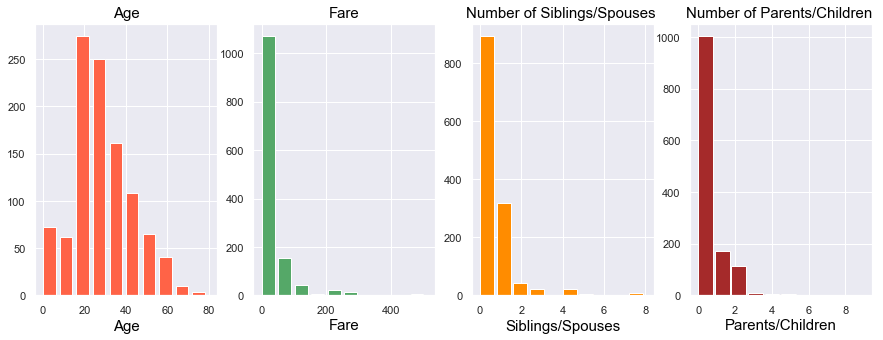

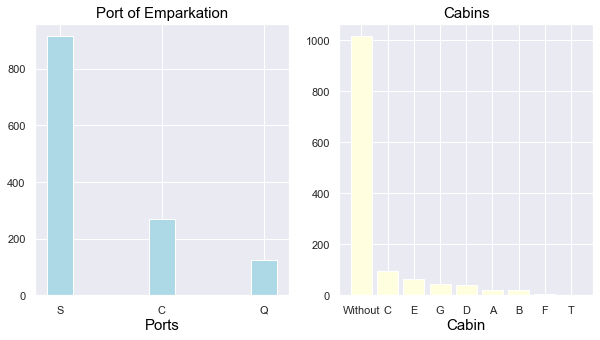

In [130]:
#Categorical Visulization

figure1, axis1 = plt.subplots(1,4, figsize = (15,5))

# age hist
axis1[0].hist(df['Age'],color='tomato',width=6)
axis1[0].set_title('Age',fontsize='15',color="black")
axis1[0].set_xlabel('Age',fontsize='15',color="black")


# fare hist
axis1[1].hist(df['Fare'],color='g',width=40)
axis1[1].set_title('Fare',fontsize='15',color="black")
axis1[1].set_xlabel('Fare',fontsize='15',color="black")


# Number of Siblings/Spouses
axis1[2].hist(df['SibSp'],color='DarkOrange',width=.68)
axis1[2].set_title('Number of Siblings/Spouses ',fontsize='15',color="black")
axis1[2].set_xlabel('Siblings/Spouses',fontsize='15',color="black")
# Parents/Children hist
axis1[3].hist(df['Parch'],color='Brown',width=.80)
axis1[3].set_title('Number of Parents/Children ',fontsize='15',color="black")
axis1[3].set_xlabel('Parents/Children',fontsize='15',color="black")

plt.show()

#numerical


figure2, axis2 = plt.subplots(1,2, figsize = (10,5))

#poe
poelist = list(df['POE'].unique())[:-1].copy()
axis2[0].bar(x = poelist, height = list(df['POE'].value_counts().values),color="LightBlue", width = 0.26)
axis2[0].set_title('Port of Emparkation',fontsize='15',color="black")
axis2[0].set_xlabel('Ports',fontsize='15',color="black")

#cabin
axis2[1].bar(x = list(df['Cabin'].unique()), height =  list(df['Cabin'].value_counts().values) ,color="lightyellow")
axis2[1].set_title('Cabins',fontsize='15',color="black")
axis2[1].set_xlabel('Cabin',fontsize='15',color="black")


plt.show()

Fare ,Siblings and Parents are not normaly distrubted 
we will scale them

## Taking care of noisy data

In [131]:
def mean_binning(col_name, nBins):
    data = sorted(list(df[col_name].values))
    bined = []
    for i in range(0,len(data),nBins ):
        temp = []
        for j in range(nBins):
           temp.append(data[i+j])        
        bined.append(np.mean(temp))

    return bined


def boundary_binning(col, bins):
    binn=np.zeros((int(len(col) / bins),bins))
    for i in range(0, len(col), bins):
        k=int(i/bins)
        for j in range (bins):
            if (col[i+j]-col[i]) < (col[i+6]-col[i+j]):
                binn[k,j]=col[i]
            else:
                binn[k,j]=col[i+6]
    return binn.ravel()


def median_binning(col, bins):
    binn=np.zeros((int(len(col) / bins),bins))
    for i in range(0, len(col), bins):
        k=int(i/bins)
        for j in range (bins):
            binn[k,j]=col[i+3]
    return binn[:, 0]


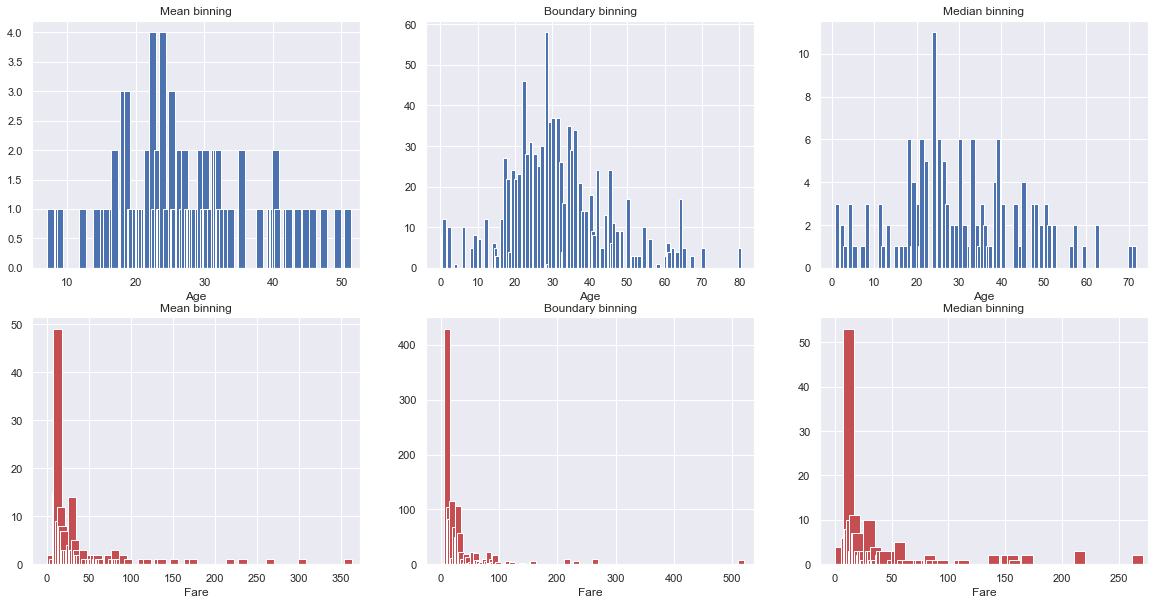

In [132]:
h_bins = 187
n_bins = 7
figure, axis = plt.subplots(2,3,figsize=(20,10))
figure

# Age Mean binning
axis[0][0].hist(mean_binning('Age', n_bins),color='b', width=1, bins=h_bins)
axis[0][0].set_title('Mean binning')
axis[0][0].set_xlabel('Age')

# Age Boundary binning
axis[0][1].hist(boundary_binning(df['Age'].sort_values(), n_bins),color='b', width=1, bins=h_bins)
axis[0][1].set_title('Boundary binning')
axis[0][1].set_xlabel('Age')

# Age Median binning
axis[0][2].hist(median_binning(df['Age'].sort_values(), n_bins),color='b', width=1, bins=h_bins)
axis[0][2].set_title('Median binning')
axis[0][2].set_xlabel('Age')

# Fare Mean binning
axis[1][0].hist(mean_binning('Fare', n_bins),color='r', width=10, bins=h_bins)
axis[1][0].set_title('Mean binning')
axis[1][0].set_xlabel('Fare')

# Fare Boundary binning
axis[1][1].hist(boundary_binning(df['Fare'].sort_values(), n_bins),color='r', width=10, bins=h_bins)
axis[1][1].set_title('Boundary binning')
axis[1][1].set_xlabel('Fare')

# Fare Median binning
axis[1][2].hist(median_binning(df['Fare'].sort_values(), n_bins),color='r', width=10, bins=h_bins)
axis[1][2].set_title('Median binning')
axis[1][2].set_xlabel('Fare')

plt.show()

In [133]:
df = df.query('Age < 80').reindex()
df = df.query('Fare < 180').reindex()

## Visualized Data analysis

1    644
0    364
Name: Male, dtype: int64


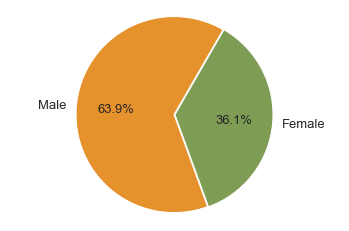

In [134]:
Male_Series=df['Male'].value_counts()
print(Male_Series)

Male_label=('Male','Female')
Male_color=('#e5912c','#7f9c55')
explode_1=(.01,0)

plt.pie([Male_Series.values[0],Male_Series.values[1]] ,labels= Male_label,
        explode=explode_1, colors= Male_color, autopct='%1.1f%%', 
        textprops={'fontsize':13}, startangle= 60)

plt.axis('equal');

3    500
2    261
1    247
Name: Class, dtype: int64


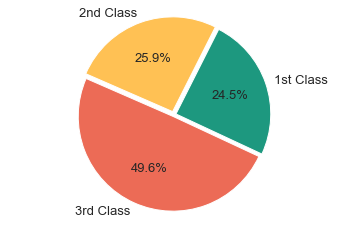

In [135]:
Class_Series=df['Class'].value_counts()
print(Class_Series)


label_2=('1st Class','2nd Class','3rd Class')
color_2=('#1d987f','#FFC154','#EC6B56')
explode_2=(.025,.035,.019)

plt.pie([Class_Series.values[2],Class_Series.values[1],Class_Series.values[0]],
        labels = label_2, explode= explode_2, colors= color_2,
        autopct='%1.1f%%', textprops={'fontsize': 13}, startangle= -25)

plt.axis('equal');

S    767
C    189
Q     50
Name: POE, dtype: int64


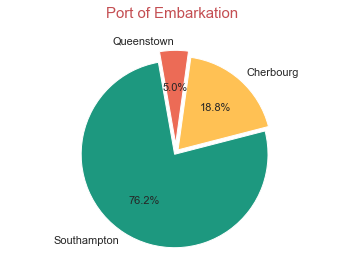

In [136]:
series_3=df['POE'].value_counts()
print(series_3)

label_3=('Southampton','Cherbourg','Queenstown')
color_3=('#1d987f','#FFC154','#EC6B56')
explode_3=(.025,.035,.092)

plt.pie([series_3.values[0],series_3.values[1],series_3.values[2]], 
        labels= label_3, explode= explode_3, colors= color_3,
        autopct='%1.1f%%', textprops={'fontsize': 11}, startangle=100,)

plt.axis('equal');
plt.title('Port of Embarkation \n                                        '
          ,color='r', fontsize = 15);

0    618
1    390
Name: Survived, dtype: int64


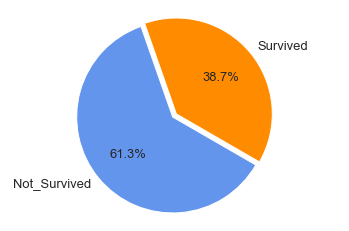

In [137]:
series_4=df['Survived'].value_counts()
print(series_4)

label_4=('Survived','Not_Survived')
color_4=('darkorange','cornflowerblue')
explode_4=(.05,0)

plt.pie([series_4.values[1],series_4.values[0]], labels= label_4,
        explode=explode_4, colors= color_4, autopct='%1.1f%%', 
        textprops={'fontsize': 13}, startangle=-30);

plt.axis('equal');

0    300
1     90
Name: Male, dtype: int64


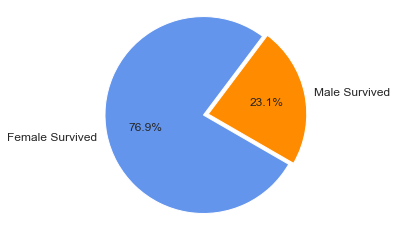

In [138]:
survived=df.query('Survived==1')
series_5=survived['Male'].value_counts()
print(series_5)

not_survived_1=series_5.values[0]
survived_1=series_5.values[1]
data_5= [survived_1,not_survived_1]

label_5=('Male Survived','Female Survived')
color_5=('darkorange','cornflowerblue')
explode_5=(.05,0)


plt.pie(data_5, labels = label_5,explode=explode_5,colors=color_5,
        autopct='%1.1f%%', textprops={'fontsize': 12}, startangle=-30);

plt.axis('equal');

In [139]:
import plotly.graph_objects as go

# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=df.SibSp,
        y=df.Parch,
        z=df.Survived,
        colorscale='RdBu'
    )
])
fig.update_layout( yaxis_title='Parch', xaxis_title='SibSp')
fig.show()

In [140]:
fig = go.Figure(data=[
    go.Contour(
        x=df.POE,
        y=df.Class,
        z=df.Survived,
        colorscale='RdBu'
    )
])
fig.update_layout( yaxis_title='Class', xaxis_title='POE')
fig.show()

more than 90% didn't survive in class 2
most from port q survived except class 2

In [141]:
fig = go.Figure(data=[
    go.Contour(
        x=df.Age,
        y=df.Age,
        z=df.Survived,
        colorscale='RdBu'
    )
])
fig.update_layout( yaxis_title='Age', xaxis_title='Age')
fig.show()

## Taking care of missing data

In [142]:
# First lets split our data to Input >>X , target >> y
# We used iloc[].values to return npArray to be used for Encoding
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Numerical missing data

In [143]:
# handle missing using SimpleImputer
# will fill nan with the mean to Age, Fare
from sklearn.impute import SimpleImputer
numeImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        #Age , Fare
numeImputer.fit(X[:, [4,7]])
X[:, [4,7]] = numeImputer.transform(X[:, [4,7]])
# return the new filled missing data to our df
df.iloc[:, :-1] = X 

### Categorical missing data

In [144]:
catImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # for Categerocal
                  #POE  
catImputer.fit(X[:, [0]])
X[:, [0]] = catImputer.transform(X[:, [0]])
# return the new filled missing data to our df
df.iloc[:, :-1] = X 

## Encoding categorical data

### Encoding the Independent Variable

In [145]:
# Encoding our input data to be suitable for Modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder              
poeValues = list(df.POE.unique())
cabinValues = list(df.Cabin.unique())
                                                             
ct = ColumnTransformer(transformers=[('encoder',                
                                    OneHotEncoder(categories=[poeValues,cabinValues],drop = 'first'),#droping a coulmn to avoid 
                                    #POE 3v ,Cabin 8v                                                             #multicollinearity trap
                                     [0,1])],
                                      remainder='passthrough')
X = np.array(ct.fit_transform(X))   

## Splitting the dataset into the Training set and Test set

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [147]:
print(X_train.shape, X_test.shape)

(806, 16) (202, 16)


In [148]:
print(y_train.shape, y_test.shape)

(806,) (202,)


## Feature Scaling

In [149]:
X_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 20.0, 0, 0,
       7.8542], dtype=object)

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Fare  SibSp Parch becuse it wasnot normally distributed
X_train[:, [12,13,14]] = sc.fit_transform(X_train[:, [12,13,14]])
X_test[:, [12,13,14]] = sc.transform(X_test[:, [12,13,14]])

# K-Nearest Neighbors (K-NN)

## Training K-NN Classification model on the Training set

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# finding the best k
test =[()]
for i in range(1,100):

    knnClassifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 1) #manhatten
    knnClassifier.fit(X_train, y_train)
    y_pred = knnClassifier.predict(X_test)
    a = accuracy_score(y_test, y_pred)
    test.append((a,i))
# creating instance of the classifier

knnClassifier = KNeighborsClassifier(n_neighbors = max(test)[1], metric = 'minkowski', p = 1)
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

## Model Accuracy

In [152]:

knny_pred = knnClassifier.predict(X_test)

In [153]:
acclist = []
knnCm = confusion_matrix(y_test, knny_pred)
acclist.append(accuracy_score(y_test, knny_pred))
print(knnCm)
accuracy_score(y_test, knny_pred)

[[109  21]
 [ 14  58]]


0.8267326732673267

## Predicting New values

In [154]:
def tun_new_input(X_new):
    '''
    Transforming,Encoding and Scaling the input
    '''
    X_new = [X_new]
    X_new = np.array(ct.transform(X_new))
    X_new[:, [12,13,14]] = sc.transform(X_new[:, [12,13,14]])
    return X_new

In [155]:
# POE Cabin Class Gendern Age SibSp Parch Fare Survived
knnX_new = tun_new_input(['Q','C', 1, 0, 38.0, 0, 0, 100])

knnClassifier.predict(knnX_new)

array([1], dtype=int64)

# Decision Tree Classification

### Training the Decision Tree Classification model

In [156]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier(criterion = 'gini')
dtClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Model Accuracy

In [157]:
dty_pred = dtClassifier.predict(X_test)

In [158]:
dtCm = confusion_matrix(y_test, dty_pred)
print(dtCm)
acclist.append(accuracy_score(y_test, dty_pred))

accuracy_score(y_test, dty_pred)

[[111  19]
 [ 10  62]]


0.8564356435643564

## Predicting New values

In [159]:
dtX_new = tun_new_input(['Q','C', 1, 0, 38.0, 0, 0, 100])
dtClassifier.predict(dtX_new)

array([1], dtype=int64)

# Naive Bayes Classifier (GaussianNB)

## Training the Naive Bayes Classifier model

In [160]:
from sklearn.naive_bayes import GaussianNB
GaussianNBclf = GaussianNB()
GaussianNBclf.fit(X_train, y_train)

GaussianNB()

## Model Accuracy

In [161]:
y_predNB = GaussianNBclf.predict(X_test)
cmNB = confusion_matrix(y_test, y_predNB)
print(cmNB)
acclist.append(accuracy_score(y_test, y_predNB))
accuracy_score(y_test, y_predNB)

[[105  25]
 [ 26  46]]


0.7475247524752475

# Naive Bayes Classifier (CategoricalNB) 

## Moding the datafram to be sutable for CategirocalNB

In [162]:
df_categorical = df.copy()
#the commented method won't help as we want our value to be in (0,..., ni-1)


#labels= ['Low', 'Middle', 'High', 'Very High', 'Extreme']

#Low               >>>  0
# Middle        >>>  1
#High              >>> 2
#Very High  >>> 3
#Extreme     >>> 4

labels= [0,1,2,3,4,]
df_categorical['Fare']= pd.cut(x = df.Fare, bins=5, labels=labels,
                              retbins = False, duplicates='raise',
                              ordered=True)

#df_categorical['Age']= df_categorical.Age.apply(lambda x: str(int(x/10))+'0s')

# 0s >>> 00
# 10s >>>  10
# 20s >>> 20
#....
df_categorical['Age']= df_categorical.Age.apply(lambda x: int(x/10)*10)

In [163]:
# lets convert the POE & Cabin into  the same form

df_categorical['Cabin'] = df_categorical['Cabin'].replace({'Without':0 , 'C':3,
                                                           'E':5, 'G':6, 'D':4, 'A':1, 'B':2, 'F':7, 'T':8})

df_categorical['POE'] = df_categorical['POE'].replace({'C':1, 'S':2,'Q':3})  

In [164]:
df_categorical.head()

,POE,Cabin,Class,Male,Age,SibSp,Parch,Fare,Survived
0,2,0,3,1,20,1,0,0,0
1,1,3,1,0,30,1,0,2,1
2,2,0,3,0,20,0,0,0,1
3,2,3,1,0,30,1,0,1,1
4,2,0,3,1,30,0,0,0,0


In [165]:
Xc = df_categorical.iloc[:,:-1].values
yc = df_categorical.iloc[:,-1].values

In [166]:
yc[0]

0

In [167]:
df_categorical.head()

,POE,Cabin,Class,Male,Age,SibSp,Parch,Fare,Survived
0,2,0,3,1,20,1,0,0,0
1,1,3,1,0,30,1,0,2,1
2,2,0,3,0,20,0,0,0,1
3,2,3,1,0,30,1,0,1,1
4,2,0,3,1,30,0,0,0,0


In [168]:
Xc[0]


array([ 2,  0,  3,  1, 20,  1,  0,  0], dtype=int64)

In [169]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=1)

In [170]:
Xc_train[0]

array([ 2,  0,  3,  1, 20,  0,  0,  0], dtype=int64)

In [171]:
from sklearn.naive_bayes import CategoricalNB

# CategoricalNB as all the data are Categorical
CategoricalNBclf = CategoricalNB()
CategoricalNBclf.fit(Xc_train, yc_train)

CategoricalNB()

In [172]:
y_predcnb = CategoricalNBclf.predict(Xc_test)
#cmcnb = confusion_matrix(yc_test, y_predcnb)
#print(cmcnb)
acclist.append(accuracy_score(yc_test, y_predcnb))

accuracy_score(yc_test, y_predcnb)

0.8118811881188119

## Comparing models accuracies

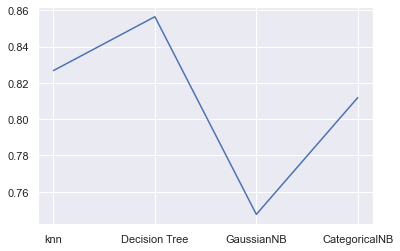

In [173]:

plt.plot(['knn','Decision Tree','GaussianNB','CategoricalNB'],acclist)
